<a href="https://colab.research.google.com/github/vbxll/Stock-prediction-using-LSTM---AAPL-/blob/main/Stock%20Prediction%20using%20LSTM%20-%20AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Install necessary libraries
!pip install tensorflow keras yfinance mplfinance -qqq

In [2]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import mplfinance as mpf

In [55]:
# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.15.0


In [5]:
# Fetch AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-09-15')

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Display the first few rows of the dataframe
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

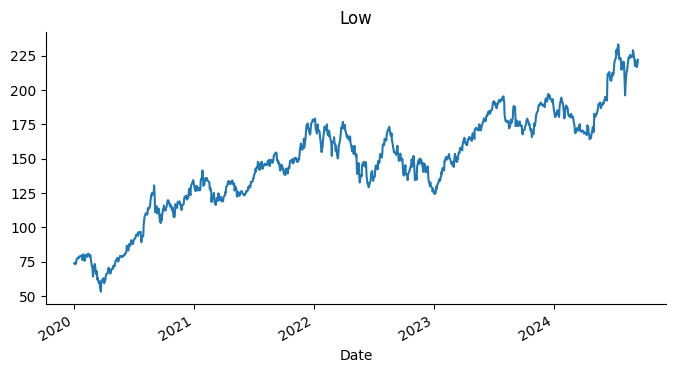

In [7]:
# Plot the 'Low' price
aapl_data['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [8]:
# Checking for missing values
aapl_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# Filling missing values, if any
aapl_data.fillna(method='ffill', inplace=True)

In [10]:
# Scaling the data (focusing on the 'Close' price)
scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))

In [11]:
# Creating the dataset
X = []
y = []
for i in range(60, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])

In [12]:
# Split the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Build the LSTM model with attention mechanism
model = Sequential()

# LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 batch_normalization (Batch  (None, 60, 50)            200       
 Normalization)                                                  
                                                                 
Total params: 30800 (120.31 KB)
Trainable params: 30700 (119.92 KB)
Non-trainable params: 100 (400.00 Byte)
_________________________________________________________________


In [16]:
# Early Stopping and Model Checkpoint callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
tensorboard = TensorBoard(log_dir='./logs')
csv_logger = CSVLogger('training_log.csv')

callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

In [18]:
# Build the corrected LSTM model
model = Sequential()

# First LSTM layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Second LSTM layer without return_sequences=True (since we want the final output)
model.add(LSTM(units=50, return_sequences=False))

# Adding Dropout and Batch Normalization for regularization
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Output layer - Dense layer with 1 unit (predicting one value)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# Train the model (using callbacks for early stopping and other features)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30851 (120.51 KB)
Trainable params: 30751 (120.12 KB)
Non-trainable params: 100 (400.00 Byte)
____________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 11ms/step - loss: 0.0205 - val_loss: 0.0507 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - 0s 14ms/step - loss: 0.0067 - val_loss: 0.0475 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0455 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 0s 11ms/step - loss: 0.0037 - val_loss: 0.0454 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 0.0445 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 0.0438 - lr: 0.0010
Epoch 8/100
29/29 [==============================] - 0s 11ms/step - loss: 0.0034 - val_loss: 0.0411 - lr: 0.0010
Epoch 9/100
29/29 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 0.0373 - lr: 0.0010
Epoch 10/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0033 - val_loss: 0.0377 - lr: 0

In [19]:
# Prepare test data
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

8/8 [==============================] - 0s 5ms/step - loss: 6.8623e-04
Test Loss:  0.000686226412653923


In [21]:
# Making predictions on test data
y_pred = model.predict(X_test)

8/8 [==============================] - 1s 5ms/step


In [22]:
# Calculating MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)

Mean Absolute Error:  0.020560068787600586
Root Mean Square Error:  0.026195925935919063


In [24]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch the latest 60 days (using a valid period, e.g., 3 months of data)
data = yf.download('AAPL', period='3mo', interval='1d')  # 3 months of daily data

# Check if data is empty
if data.empty:
    raise ValueError("No data was fetched. Please check the ticker or period.")

# Select the 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

[*********************100%%**********************]  1 of 1 completed


In [25]:
# Prepare the latest data for prediction
X_latest = np.array([scaled_data[-60:].reshape(60)])
X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

# Make predictions for the next 4 days
predicted_stock_price = model.predict(X_latest)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print("Predicted Stock Prices for the next 4 days: ", predicted_stock_price)

1/1 [==============================] - 0s 91ms/step
Predicted Stock Prices for the next 4 days:  [[223.31892]]


In [27]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch the latest 3 months of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d')

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Prepare the latest data for prediction (most recent 60 days)
X_latest = np.array([scaled_data[-60:].reshape(60)])
X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = X_latest  # Initialize with the latest batch of data

for i in range(4):  # Predicting 4 future days
    next_prediction = model.predict(current_batch)

    # Append the predicted price to the results (inverse transform back to original scale)
    predicted_price = scaler.inverse_transform(next_prediction)[0, 0]
    predicted_prices.append(predicted_price)

    # Update the batch to include the predicted value (shift window by 1 day)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

# Print the predictions formatted to 2 decimal places
for i, price in enumerate(predicted_prices, 1):
    print(f"Day {i} prediction: ${price:.2f}")


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
Day 1 prediction: $223.32
Day 2 prediction: $224.45
Day 3 prediction: $225.05
Day 4 prediction: $225.44


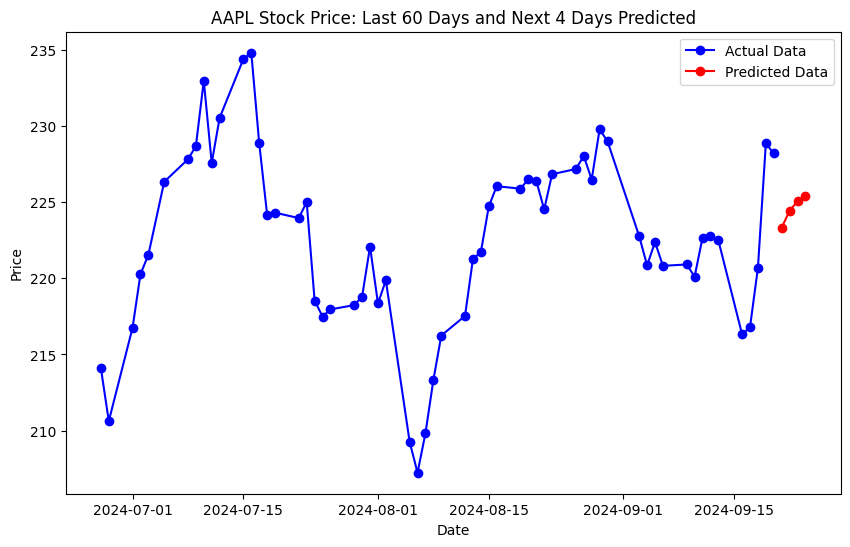

In [28]:
# Ensure predicted_stock_price is a flattened array
predicted_stock_price = np.array(predicted_prices)  # This is now (4,) from the earlier loop

# Create a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Plot the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plot the predicted data
plt.plot(prediction_dates, predicted_stock_price, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


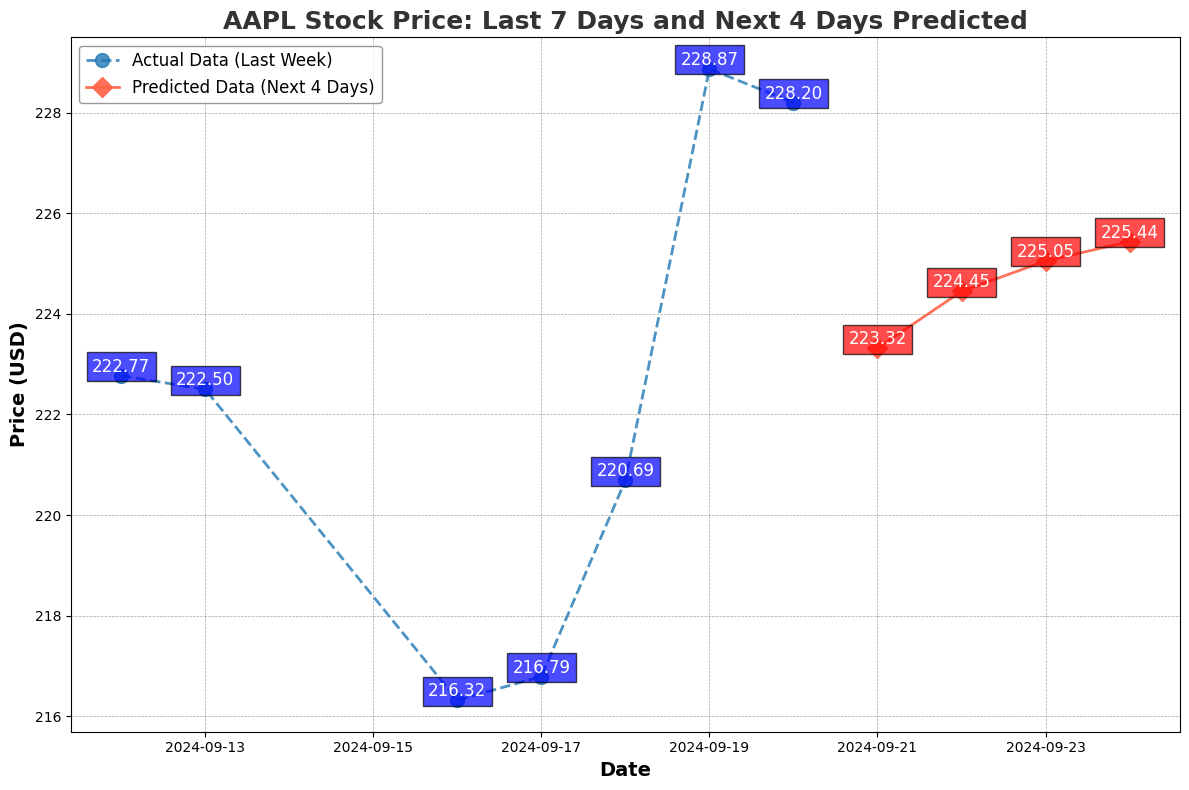

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming predicted_prices is your list of predicted stock prices for the next 4 days

# Create a list of dates for the predictions
last_date = data.index[-1]  # Last available date in the dataset
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot actual data for the last 7 days with a thicker, dashed line and large blue markers
plt.plot(data.index[-7:], data['Close'][-7:], linestyle='--', marker='o', markersize=10, linewidth=2, color='#1f77b4', label='Actual Data (Last Week)', alpha=0.8)

# Plot predicted data for the next 4 days with a thicker, solid line and large red markers
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='D', markersize=10, linewidth=2, color='#ff6347', label='Predicted Data (Next 4 Days)', alpha=0.9)

# Add labels to each point on the plot with a vibrant background and larger font size
for i, (date, price) in enumerate(zip(prediction_dates, predicted_prices)):
    plt.text(date, price, f'{price:.2f}', ha='center', va='bottom', fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.7))

for i, (date, price) in enumerate(zip(data.index[-7:], data['Close'][-7:])):
    plt.text(date, price, f'{price:.2f}', ha='center', va='bottom', fontsize=12, color='white', bbox=dict(facecolor='blue', alpha=0.7))

# Add vibrant gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Customize the title and axis labels with a vibrant font style
plt.title("AAPL Stock Price: Last 7 Days and Next 4 Days Predicted", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=14, fontweight='bold')

# Customize the legend
plt.legend(loc='upper left', fontsize=12, frameon=True, facecolor='white', edgecolor='gray')

# Show the plot with tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [46]:
!git commit

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [47]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [53]:
!git push -u origin main

Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 348.10 KiB | 15.13 MiB/s, done.
Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/vbxll/Stock-prediction-using-LSTM---AAPL-.git
   f0da5b9..88524b6  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [57]:
!mv /content/best_model.h5 /content/Stock-prediction-using-LSTM---AAPL-/best_model.h5

mv: cannot stat '/content/best_model.h5': No such file or directory


In [59]:
!mv /content/training_log.csv /content/Stock-prediction-using-LSTM---AAPL-/training_log.csv

In [67]:
!mv /content/logs /content/Stock-prediction-using-LSTM---AAPL-/logs

In [65]:
!git add 'best model.h5'
!git add 'training_log.csv

fatal: pathspec 'best model.h5' did not match any files
/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [71]:
!git add 'logs'

In [68]:
!git add 'best_model.h5' 'training_log.csv'

In [72]:
!git commit -m "Updated files"

[main 5c9fba2] Updated files
 3 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 logs/train/events.out.tfevents.1726936196.46612cd670ec.654.0.v2
 create mode 100644 logs/train/events.out.tfevents.1726936319.46612cd670ec.654.1.v2
 create mode 100644 logs/validation/events.out.tfevents.1726936324.46612cd670ec.654.2.v2


In [73]:
!git push -u origin main

Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 55.19 KiB | 5.52 MiB/s, done.
Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/vbxll/Stock-prediction-using-LSTM---AAPL-.git
   f039a34..5c9fba2  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.
